# Sample - SP500 Constituents

*[Source](https://wrds-web.wharton.upenn.edu/wrds/ds/comp/index/constituents.cfm)*

*TIC: i0003 (SP&500)*

In [11]:
NAME = '01-01_sample_sp500_constituents'
PROJECT = 'conference-calls-sentiment'
PYTHON_VERSION = '3.7.0'

### Imports  

In [12]:
import os
import re
import pandas as pd

### Settings

In [13]:
workdir = re.sub("(?<={})[\w\W]*".format(PROJECT), "", os.getcwd())
os.chdir(workdir)

pipeline = os.path.join('2_pipeline', NAME)
if not os.path.exists(pipeline):
    os.makedirs(pipeline)
    for folder in ['out', 'store', 'tmp']:
        os.makedirs(os.path.join(pipeline, folder))

---
# Main Code

In [ ]:
sp500_raw = pd.read_csv(os.path.join('0_data', 'sp500_constituents', 'sp500_constituents_2000-2019.csv'))
sp500_raw.head()

## Process data

In [ ]:
sp500 = (sp500_raw.copy()
                  .assign(start_date=lambda x: pd.to_datetime(x['from'], format=r'%Y%m%d'),
                          end_date=lambda x: pd.to_datetime(x['thru'], format=r'%Y%m%d'))
                  .assign(end_date=lambda x: x['end_date'].fillna(pd.Timestamp('2020-12-31')))  # Missing thru value means firm is still in the S&P500
                  .sort_values(['gvkey', 'from'])
                  .reset_index(drop=True)
                  .rename(columns={'co_conm':'coname',
                                   'co_tic': 'ticker',
                                   'co_sic': 'sic',
                                   'co_cik': 'cik'})
                  .filter(['gvkey', 'start_date', 'end_date', 'coname', 'ticker', 'cik', 'sic']))
sp500

In [17]:
# Save as .feather
sp500.to_feather(os.path.join(pipeline, 'out', 'sp500_consituents_2000-2020.feather'))

## Save lists with company identifiers

In [18]:
# Store S&P500 GVKEYs
gvkeys = sp500['gvkey'].unique()
with open(os.path.join(pipeline, 'store', 'sp500_gvkeys.txt'), 'w') as f:
    for gvkey in gvkeys:
        f.write(f'{str(gvkey)}\n')

# Store S&P500 ticker
tickers = sp500['ticker'].unique()
with open(os.path.join(pipeline, 'store', 'sp500_tickers.txt'), 'w') as f:
    for ticker in tickers:
        f.write(f'{str(ticker)}\n')

---
# Analysis

In [19]:
import matplotlib.pyplot as plt
import paper_style

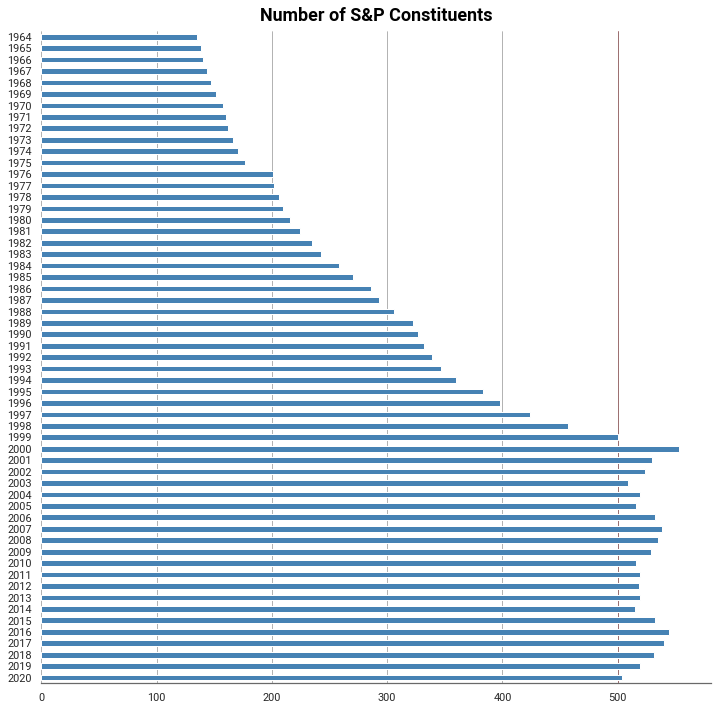

In [25]:
fig, ax = plt.subplots(figsize=(12,12), facecolor='w')
(sp500.apply(lambda x: range(x['start_date'].year, x['end_date'].year+1), axis=1)
      .explode()
      .value_counts()
      .sort_index(ascending=False)
      .plot.barh(ax=ax, color='steelblue'))
ax.set_title('Number of S&P Constituents', fontsize=18)
ax.axvline(500, c='r', lw=0.75, zorder=0)
ax.grid(axis='y')